# Task 1 - Importing Libraries

In [1]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
print("Tensorflow Version:",tf.__version__)
print("Is Using GPU ?:",tf.test.is_gpu_available())

Tensorflow Version: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is Using GPU ?: False


# Task 2 - Preprocess the Data

In [3]:
def get_three_classes(x,y):
    
    # Collecting the top three classes
    indices_0,_ = np.where(y==0.)
    indices_1,_ = np.where(y==1.)
    indices_2,_ = np.where(y==2.)
    
    indices = np.concatenate([indices_0,indices_1,indices_2],axis=0)
    x = x[indices]
    y = y[indices]
    
    # Converting into one hot encoded
    y = tf.keras.utils.to_categorical(y)
    
    return x , y
    

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train,y_train = get_three_classes(x_train,y_train)
x_test,y_test = get_three_classes(x_test,y_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3 - Visualize Examples

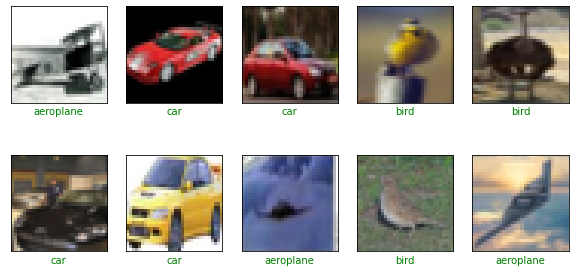

In [5]:
class_names = ['aeroplane','car','bird']

def show_random_examples(x,y,p):
    indices = np.random.choice(range(x.shape[0]),10,replace=False)
    x = x[indices]
    y = y[indices]
    p = p[indices]
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col ='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()
show_random_examples(x_train,y_train,y_train)
    
    

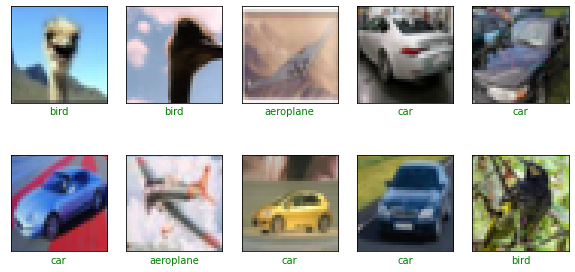

In [6]:
show_random_examples(x_test,y_test,y_test)

# Task 4 - Create Model

In [7]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense

def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,padding='same',activation='relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    model = tf.keras.Sequential()
    model.add(Input(shape=(32,32,3)))
    model = add_conv_block(model,32)
    model = add_conv_block(model,64)
    model = add_conv_block(model,128)
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
           loss = 'categorical_crossentropy',
           optimizer='adam',metrics=['accuracy'])
    return model 
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

# Task 5 - Train the model

In [8]:
h = model.fit(
          x_train/255.,y_train,validation_data = (x_test/255,y_test),
          epochs=10,batch_size=128,
          callbacks=[
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
              tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
              save_best_only = True,save_weights_only=False,
              monitor='val_accuracy')
                    ]
                    )


Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 87s 6ms/sample - loss: 0.8850 - accuracy: 0.6806 - val_loss: 2.0185 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 77s 5ms/sample - loss: 0.5460 - accuracy: 0.7781 - val_loss: 1.6136 - val_accuracy: 0.5147
Epoch 3/10
15000/15000 [==============================] - 72s 5ms/sample - loss: 0.4781 - accuracy: 0.8074 - val_loss: 1.3610 - val_accuracy: 0.5710
Epoch 4/10
15000/15000 [==============================] - 72s 5ms/sample - loss: 0.4355 - accuracy: 0.8279 - val_loss: 1.0596 - val_accuracy: 0.6523
Epoch 5/10
15000/15000 [==============================] - 78s 5ms/sample - loss: 0.3879 - accuracy: 0.8483 - val_loss: 0.5970 - val_accuracy: 0.7670
Epoch 6/10
15000/15000 [==============================] - 76s 5ms/sample - loss: 0.3715 - accuracy: 0.8526 - val_loss: 0.3135 - val_accuracy: 0.8717
Epoch 7/10
15000/15000 [==============================] -

# Task 6 - Final Prediction


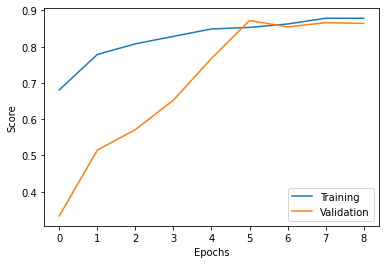

In [9]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']
plt.plot(range(len(accs)),accs,label='Training')
plt.plot(range(len(val_accs)),val_accs,label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
plt.show()

In [10]:
#model = tf.keras.models.load_model('models/model_0.889.h5')

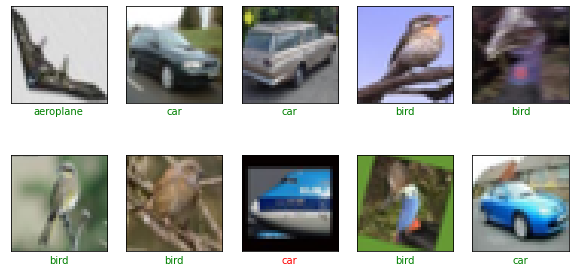

In [11]:
preds = model.predict(x_test/255.)
show_random_examples(x_test,y_test,preds)